## Importing Liabraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
import xgboost as xgb

### Exploratory analysis

In [4]:
df = pd.read_csv('diabetes.csv')

print("Shape of the dataframe =",df.shape)

df.sample(5)

Shape of the dataframe = (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
703,2,129,0,0,0,38.5,0.304,41,0
195,5,158,84,41,210,39.4,0.395,29,1
184,4,141,74,0,0,27.6,0.244,40,0
607,1,92,62,25,41,19.5,0.482,25,0
363,4,146,78,0,0,38.5,0.520,67,1


In [5]:
print("Number of patients that tested positive for diabetes =",df[df['Outcome']==1]['Outcome'].count())
print("Number of patients that tested negative for diabetes =",df[df['Outcome']==0]['Outcome'].count())

Number of patients that tested positive for diabetes = 268
Number of patients that tested negative for diabetes = 500


In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#### Judging from the correlation matrix above, none of the features in the dataset has a high correlation with another feature.
#### The highest correlation is between Pregnancies and Age (54.4%)

In [7]:
df.isnull().values.any()

False

#### As we can see, there are no missing values in the dataset.

## Modeling

In [81]:
lr = LogisticRegression()
svm = SVC()
randf = RandomForestClassifier()
skf = StratifiedKFold(n_splits=10,shuffle=True)

#### Because of the fact that the number of patients who tested positive for diabetes is only 268, Stratified Kfold split will work better than K fold split since in the former case folds are made by preserving the percentage of samples for each class.

In [82]:

def get_rmse(model,X_train,X_test,Y_train,Y_test):
    # Root Mean Squared Error for each model
    model.fit(X_train,Y_train)
    pred = model.predict(X_test)
    return np.sqrt(mean_squared_error(Y_test, pred))


scores_lr = []
scores_svm = []
scores_randf = []

rmse_lr = []
rmse_svm = []
rmse_randf = []

for train_index, test_index in skf.split(df[df.columns.difference(['Outcome'])],df['Outcome']):
    
    X_train, X_test = df[df.columns.difference(['Outcome'])].iloc[train_index], df[df.columns.difference(['Outcome'])].iloc[test_index]
    Y_train, Y_test = df['Outcome'].iloc[train_index], df['Outcome'].iloc[test_index]
    
    
    rmse_lr.append(get_rmse(lr,X_train, X_test, Y_train, Y_test))
    rmse_svm.append(get_rmse(svm,X_train, X_test, Y_train, Y_test))
    rmse_randf.append(get_rmse(randf,X_train, X_test, Y_train, Y_test))



C:\Users\hmkrt\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hmkrt\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [95]:
print(f'''Mean RMSE Logistic Regression = {round(np.asarray(rmse_lr).mean(),3)}
\nMean RMSE SVM = {round(np.asarray(rmse_svm).mean(),3)}
\nMean RMSE Random Forest = {round(np.asarray(rmse_randf).mean(),3)}''')

Mean RMSE Logistic Regression = 0.468

Mean RMSE SVM = 0.484

Mean RMSE Random Forest = 0.483


#### As we can see the Logistic Regression model has the lowest root mean squared error.

### Extreme Gradient Boosting model

In [10]:
X, y = df.iloc[:,:-1],df.iloc[:,-1]

In [13]:
data_dmatrix = xgb.DMatrix(data=X,label=y) # convert the dataset into an optimized data structure called Dmatrix that XGBoost supports

In [84]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.01,
                'max_depth': 7, 'alpha': 15}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=1000,early_stopping_rounds=20,metrics="rmse", as_pandas=True, seed=123)

In [85]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.499478,0.000024,0.499530,0.000095
1,0.498759,0.000185,0.498829,0.000278
2,0.497881,0.000244,0.498003,0.000437
3,0.496967,0.000426,0.497176,0.000512
4,0.495933,0.000562,0.496254,0.000680
...,...,...,...,...
995,0.383138,0.003765,0.404405,0.021991
996,0.383120,0.003773,0.404392,0.021991
997,0.383115,0.003775,0.404389,0.021989
998,0.383105,0.003777,0.404381,0.021990


In [92]:
print('RMSE Extreme Gradient boost: ', round(cv_results["test-rmse-mean"].iloc[-1],3))

RMSE Extreme Gradient boost:  0.404


#### As we can see Extreme Gradient boost has lower RMSE  (0.404) compared to the models above

- Mean RMSE Logistic Regression = 0.468

- Mean RMSE SVM = 0.484

- Mean RMSE Random Forest = 0.483


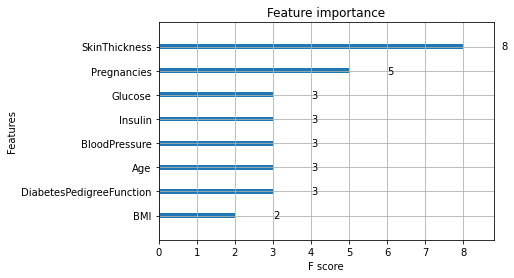

In [77]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

### Also, we can see that Skin thickness and Pregnancies are two most important features when classifing person with positive or negative diabetes. 